In [2]:
import os
import sys
from dotenv import load_dotenv

notebook_path = os.getcwd()

# One level up from the notebook
PROJECT_ROOT = os.path.abspath(os.path.join(notebook_path, "../"))

DATA_ROOT = os.path.join(PROJECT_ROOT, "data")

sys.path.insert(1, PROJECT_ROOT)
load_dotenv()

True

In [3]:
import glob

import databento as db
import pandas as pd
import numpy as np
import datetime

import plotly.graph_objects as go

Download from Databento (Magnificent 7, OHLCV-1min)

Remark: FB was changed to META on June 9, 2022.

In [127]:
client = db.Historical(os.getenv("DATABENTO_API"))
symbols = ["FB"]
start_date = datetime.datetime(2018, 1, 1, 0, 0, 0)
end_date = datetime.datetime(2025, 1, 1, 0, 0, 0)
min_allowed_date = datetime.datetime(2018, 5, 1, 0, 0, 0)

for symbol in symbols:
    current_date = start_date
    df = pd.DataFrame()

    while current_date < end_date:
        next_date = current_date + pd.DateOffset(years=1)
        print(current_date, next_date)

        data = client.timeseries.get_range(
            dataset="XNAS.ITCH",
            symbols=symbol,
            schema="ohlcv-1m",
            start=max(current_date, min_allowed_date).strftime("%Y-%m-%dT%H:%M:%S"),
            end=next_date.strftime("%Y-%m-%dT%H:%M:%S"),
        )

        tmp_df = data.to_df()
        current_date = next_date
        if len(tmp_df) == 0: continue
        tmp_df.to_csv(f"../data/databento/{symbol}_ohlcv-1m_{tmp_df.index.min().strftime('%Y-%m-%d')}.csv")

2018-01-01 00:00:00 2019-01-01 00:00:00
2019-01-01 00:00:00 2020-01-01 00:00:00
2020-01-01 00:00:00 2021-01-01 00:00:00
2021-01-01 00:00:00 2022-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

The streaming request contained one or more days which have reduced quality: 2021-07-07 (degraded), 2021-10-26 (degraded). See: https://databento.com/docs/api-reference-historical/metadata/metadata-get-dataset-condition



2022-01-01 00:00:00 2023-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

The streaming request contained one or more days which have reduced quality: 2022-09-19 (degraded). See: https://databento.com/docs/api-reference-historical/metadata/metadata-get-dataset-condition



2023-01-01 00:00:00 2024-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

No data found for the request you submitted.

C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

The streaming request had one or more symbols which did not resolve: FB.



2024-01-01 00:00:00 2025-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

No data found for the request you submitted.

C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\1460902285.py:15: BentoWarning:

The streaming request had one or more symbols which did not resolve: FB.



In [59]:
client = db.Historical(os.getenv("DATABENTO_API"))
symbols = ["SPY", "AAPL", "MSFT", "AMZN", "GOOG", "META", "NVDA", "TSLA"]
start_date = datetime.datetime(2018, 1, 1, 0, 0, 0)
end_date = datetime.datetime(2025, 1, 1, 0, 0, 0)
min_allowed_date = datetime.datetime(2018, 5, 1, 0, 0, 0)

for symbol in symbols:
    current_date = start_date
    df = pd.DataFrame()

    while current_date < end_date:
        next_date = current_date + pd.DateOffset(years=1)
        print(current_date, next_date)

        data = client.timeseries.get_range(
            dataset="XNAS.ITCH",
            symbols=symbol,
            schema="ohlcv-1m",
            start=max(current_date, min_allowed_date).strftime("%Y-%m-%dT%H:%M:%S"),
            end=next_date.strftime("%Y-%m-%dT%H:%M:%S"),
        )

        tmp_df = data.to_df()
        current_date = next_date
        if len(tmp_df) == 0: continue
        tmp_df.to_csv(f"../data/databento/{symbol}_ohlcv-1m_{tmp_df.index.min().strftime('%Y-%m-%d')}.csv")

2018-01-01 00:00:00 2019-01-01 00:00:00
2019-01-01 00:00:00 2020-01-01 00:00:00
2020-01-01 00:00:00 2021-01-01 00:00:00
2021-01-01 00:00:00 2022-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\3738543734.py:16: BentoWarning: The streaming request contained one or more days which have reduced quality: 2021-07-07 (degraded), 2021-10-26 (degraded). See: https://databento.com/docs/api-reference-historical/metadata/metadata-get-dataset-condition
  data = client.timeseries.get_range(


2022-01-01 00:00:00 2023-01-01 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_33524\3738543734.py:16: BentoWarning: The streaming request contained one or more days which have reduced quality: 2022-09-19 (degraded). See: https://databento.com/docs/api-reference-historical/metadata/metadata-get-dataset-condition
  data = client.timeseries.get_range(


2023-01-01 00:00:00 2024-01-01 00:00:00
2024-01-01 00:00:00 2025-01-01 00:00:00


# Read

Aggregate 1 min data into whatever time frame.(sample operation)

In [3]:
symbol = "AAPL"
date   = "2019-01-02"

df = pd.read_csv(os.path.join(DATA_ROOT, "databento", f"{symbol}_ohlcv-1m_{date}.csv"), index_col=0)
df.index = pd.to_datetime(df.index)

In [7]:
timeframe = "1h"
resampled_df = df.resample(timeframe).agg(
                    {
                        'open': 'first',
                        'high': 'max',
                        'low': 'min',
                        'close': 'last',
                        'volume': 'sum',
                    }
                )

<Axes: xlabel='ts_event'>

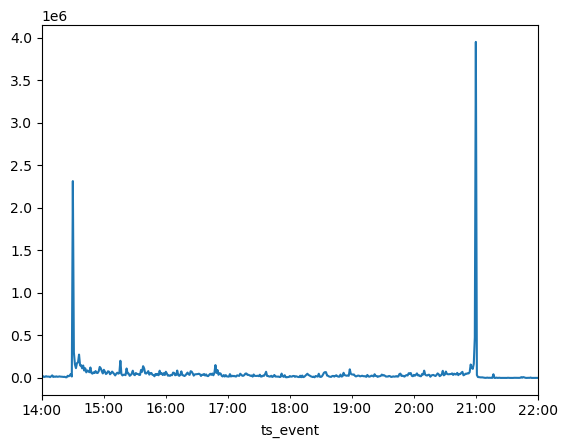

In [24]:
df.loc['2019-01-03 14:00': '2019-01-03 22:00', 'volume'].plot()

combine multiple symbols

In [128]:
def read_df_with_prefix(directory, prefix):
    tmp = []

    for filename in glob.glob(os.path.join(directory, f"{prefix}*")):
        tmp.append(pd.read_csv(filename, index_col=0))

    return pd.concat(tmp, axis=0)

# # Example usage:
# symbol = "AAPL"

# directory = os.path.join(DATA_ROOT, "databento")
# prefix = f"{symbol}_ohlcv-1m_"

# df = read_df_with_prefix(directory, prefix)
# df.index = pd.to_datetime(df.index)

In [195]:
symbols = ["SPY", "AAPL", "MSFT", "AMZN", "GOOG", "NVDA", "TSLA"] # dropped META because of FB-META change.
tmp = []

for symbol in symbols:
    directory = os.path.join(DATA_ROOT, "databento")
    prefix = f"{symbol}_ohlcv-1m_"

    tmpdf = read_df_with_prefix(directory, prefix)
    tmpdf.index = pd.to_datetime(tmpdf.index)
    tmpdf = tmpdf[['open','high','low','close','volume']]
    tmpdf.columns = [f"{symbol}_{x}" for x in tmpdf.columns]
    tmp.append(tmpdf)

df = pd.concat(tmp, axis=1)

In [199]:
# deal with META separately...
tmp = []
for fname in glob.glob(os.path.join(directory, "FB_ohlcv-1m_*")):
    tmpdf = pd.read_csv(fname, index_col=0)
    tmpdf.index = pd.to_datetime(tmpdf.index)
    tmpdf = tmpdf[['open','high','low','close','volume']]
    tmp.append(tmpdf)

fb_df = pd.concat(tmp, axis=0)
fb_df = fb_df.loc[:'2022-06-09']

tmp = []
for fname in glob.glob(os.path.join(directory, "META_ohlcv-1m_*")):
    tmpdf = pd.read_csv(fname, index_col=0)
    tmpdf.index = pd.to_datetime(tmpdf.index)
    tmpdf = tmpdf[['open','high','low','close','volume']]
    tmp.append(tmpdf)

meta_df = pd.concat(tmp, axis=0)
meta_df = meta_df.loc['2022-06-09':]

meta_df = pd.concat([fb_df, meta_df], axis=0)
meta_df.columns = [f"META_{x}" for x in meta_df.columns]

In [200]:
# merge back
df = pd.concat([df, meta_df], axis=1)

<Axes: xlabel='ts_event'>

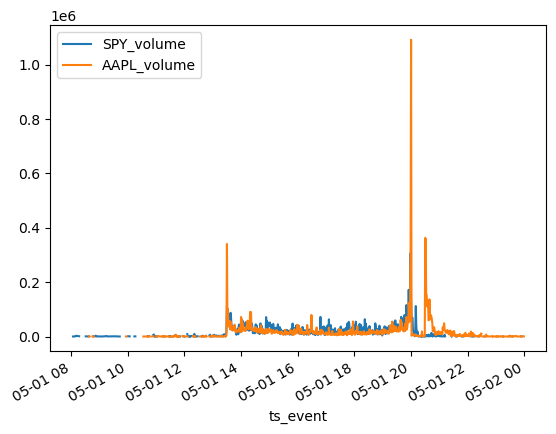

In [144]:
df.loc['2018-05-01':'2018-05-01', ['SPY_volume', 'AAPL_volume']].plot()

In [252]:
start_time = '14:30'
end_time = '21:00'

methods = {
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
}

agg_methods = {}
for symbol in (symbols+['META']):
    for col, method in methods.items():
        agg_methods[f"{symbol}_{col}"] = method

timeframe = "1d"
tmp = df.resample("1d").agg(agg_methods)
tmp = tmp.dropna() # non-trading days are na
trading_days = tmp.index

resampled_df = df.between_time(start_time, end_time).resample(timeframe).agg(agg_methods)
# aggregation creates non-trading dates. line below eliminates them.
resampled_df = resampled_df.loc[resampled_df.index.strftime("%Y-%m-%d").isin(trading_days.strftime("%Y-%m-%d"))]

In [273]:
resampled_df

,SPY_open,SPY_high,SPY_low,SPY_close,SPY_volume,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_volume,...,TSLA_open,TSLA_high,TSLA_low,TSLA_close,TSLA_volume,META_open,META_high,META_low,META_close,META_volume
ts_event,,,,,,,,,,,,,,,,,,,,,
2018-05-01 00:00:00+00:00,263.520,265.52,262.11,265.15,9612444.0,167.755,178.00,166.50,175.06,10010395.0,...,297.42,301.02,293.40,300.82,1242352.0,172.42,174.78,170.23,174.40,5008549.0
2018-05-02 00:00:00+00:00,264.270,265.68,262.36,262.45,10234741.0,176.140,177.75,175.22,176.42,10087147.0,...,299.81,311.64,298.00,301.85,1965089.0,176.38,178.09,175.75,175.97,6653583.0
2018-05-03 00:00:00+00:00,260.475,263.36,259.05,262.95,19136331.0,175.780,177.50,174.46,177.04,7665886.0,...,282.48,286.00,275.25,283.95,2923014.0,173.89,175.73,172.12,174.22,5753497.0
2018-05-04 00:00:00+00:00,263.760,266.78,263.63,266.18,10718099.0,182.970,184.25,182.52,183.90,9711912.0,...,288.69,296.79,285.29,293.81,1749153.0,176.14,176.98,175.15,176.72,3808709.0
2018-05-07 00:00:00+00:00,267.410,268.02,266.11,266.75,7173030.0,187.370,187.66,184.75,185.02,6562690.0,...,299.63,305.95,299.21,302.30,1827504.0,179.03,179.35,177.17,177.86,3960865.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24 00:00:00+00:00,596.060,602.20,595.47,601.06,3587239.0,255.480,258.36,255.29,257.84,6938715.0,...,435.83,466.49,435.14,464.90,12896896.0,602.21,608.22,599.25,607.75,1560187.0
2024-12-26 00:00:00+00:00,599.460,602.48,598.09,601.24,3357937.0,258.190,260.09,257.63,259.10,9028441.0,...,465.02,465.27,451.02,454.03,12195168.0,605.85,606.41,598.94,603.39,2313856.0
2024-12-27 00:00:00+00:00,597.470,597.76,590.77,595.20,6896726.0,257.840,258.70,253.06,255.85,17585064.0,...,449.27,449.89,426.49,431.81,18079141.0,599.40,601.77,589.80,599.98,2784967.0


In [279]:
tmp = []
for symbol in (symbols+['META']):
    tmpdf = pd.read_csv(os.path.join(DATA_ROOT, f"{symbol}.O.csv"), index_col=0)
    tmpdf.columns = [f"{symbol}_{x}" for x in tmpdf.columns]
    tmpdf.index = pd.to_datetime(tmpdf.index, utc=True)
    tmp.append(tmpdf)

yf_df = pd.concat(tmp, axis=1)

calculate adjust factor for adjusted factor with yfinance data...

In [292]:
yf_df = yf_df.loc['2018-05-01':'2024-12-31',["SPY_ADJ_CLOSE","AAPL_CLOSE","MSFT_CLOSE",'AMZN_CLOSE','GOOG_CLOSE','NVDA_CLOSE','TSLA_CLOSE','META_CLOSE']]
yf_df = yf_df.rename(columns={"SPY_ADJ_CLOSE": "SPY_CLOSE"})

In [293]:
yf_df

,SPY_CLOSE,AAPL_CLOSE,MSFT_CLOSE,AMZN_CLOSE,GOOG_CLOSE,NVDA_CLOSE,TSLA_CLOSE,META_CLOSE
2018-05-01 00:00:00+00:00,237.557266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-02 00:00:00+00:00,235.961380,41.707637,87.044921,78.48400,51.035621,5.600075,20.076669,175.399982
2018-05-03 00:00:00+00:00,235.441498,41.783225,87.566204,78.60375,51.002739,5.765372,18.963336,173.357783
2018-05-04 00:00:00+00:00,238.489563,43.422524,88.580844,79.04750,52.222855,5.915575,19.606002,175.937927
2018-05-07 00:00:00+00:00,239.296494,43.736683,89.567558,80.00700,52.550677,6.153624,20.184669,177.292752
...,...,...,...,...,...,...,...,...
2024-12-25 00:00:00+00:00,NaN,258.200000,439.330000,229.05000,197.570000,140.220000,462.280000,607.750000
2024-12-26 00:00:00+00:00,601.340027,259.020000,438.110000,227.05000,197.100000,139.930000,454.130000,603.350000
2024-12-27 00:00:00+00:00,595.010010,255.590000,430.530000,223.75000,194.040000,137.010000,431.660000,599.810000
2024-12-30 00:00:00+00:00,588.219971,252.200000,424.830000,221.30000,192.690000,137.490000,417.410000,591.240000


In [296]:
resampled_df[[f"{x}_close" for x in (symbols+['META'])]]

,SPY_close,AAPL_close,MSFT_close,AMZN_close,GOOG_close,NVDA_close,TSLA_close,META_close
ts_event,,,,,,,,
2018-05-01 00:00:00+00:00,265.15,175.06,95.35,1585.15,1037.81,228.30,300.82,174.40
2018-05-02 00:00:00+00:00,262.45,176.42,93.11,1568.00,1023.00,225.56,301.85,175.97
2018-05-03 00:00:00+00:00,262.95,177.04,94.30,1573.00,1026.00,233.37,283.95,174.22
2018-05-04 00:00:00+00:00,266.18,183.90,95.32,1580.50,1047.77,239.20,293.81,176.72
2018-05-07 00:00:00+00:00,266.75,185.02,96.30,1599.01,1054.79,248.97,302.30,177.86
...,...,...,...,...,...,...,...,...
2024-12-24 00:00:00+00:00,601.06,257.84,439.11,228.80,197.51,139.61,464.90,607.75
2024-12-26 00:00:00+00:00,601.24,259.10,438.30,227.02,197.14,139.78,454.03,603.39
2024-12-27 00:00:00+00:00,595.20,255.85,430.50,224.16,194.44,137.10,431.81,599.98


In [308]:
factor_df = pd.DataFrame(index=resampled_df.index)

for symbol in (symbols+['META']):
    factor_df[symbol] = yf_df.loc['2018-05-01':'2024-12-31',f"{symbol}_CLOSE"] / resampled_df[f'{symbol}_close']

factor_df = factor_df.ffill()
factor_df.to_csv(os.path.join(DATA_ROOT, "offset_factor", "offset_factor.csv"))

<Axes: xlabel='ts_event'>

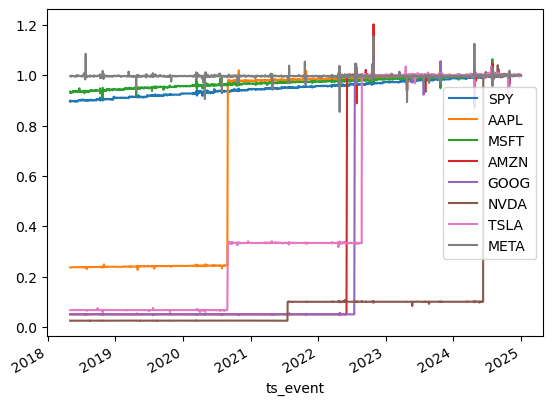

In [309]:
# factor_df = pd.DataFrame(index=resampled_df.index)
factor_df.plot()

<Axes: >

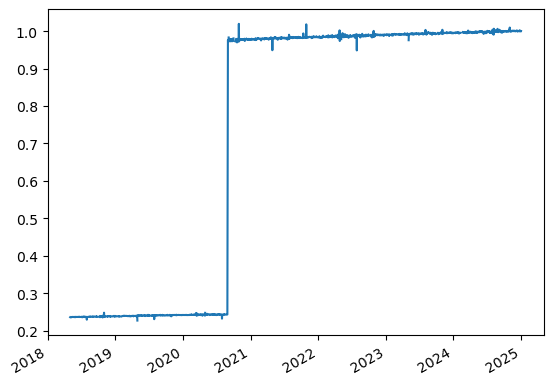

In [289]:
(yf_df.loc['2018-05-01':'2024-12-31',"AAPL_CLOSE"] / resampled_df['AAPL_close']).plot()

In [206]:
resampled_df[[f"{x}_close" for x in (symbols+['META'])]]

,SPY_close,AAPL_close,MSFT_close,AMZN_close,GOOG_close,NVDA_close,TSLA_close,META_close
ts_event,,,,,,,,
2018-05-01 00:00:00+00:00,265.38,175.20,95.33,1588.00,1038.70,228.50,301.05,174.17
2018-05-02 00:00:00+00:00,262.71,176.50,93.47,1568.60,1023.95,225.62,287.50,176.18
2018-05-03 00:00:00+00:00,262.56,176.90,94.40,1571.60,1024.52,233.30,283.00,174.35
2018-05-04 00:00:00+00:00,266.44,184.10,95.29,1581.00,1047.00,239.99,293.97,176.75
2018-05-07 00:00:00+00:00,266.58,185.00,96.08,1597.70,1054.90,249.43,303.98,177.92
...,...,...,...,...,...,...,...,...
2024-12-24 00:00:00+00:00,601.20,258.13,439.17,228.87,197.62,139.77,465.35,608.00
2024-12-26 00:00:00+00:00,601.16,259.10,437.90,226.95,197.09,139.72,453.38,603.08
2024-12-27 00:00:00+00:00,594.94,254.88,430.01,224.16,194.04,136.71,430.96,599.50


(one) multiple periods of beta, one symbol.

In [149]:
import statsmodels.formula.api as sm

TARGET = "TSLA"

# Calculate daily returns for AAPL and SPY
resampled_df[f"{TARGET}_returns"] = resampled_df[f"{TARGET}_close"] / resampled_df[f"{TARGET}_close"].shift(1) - 1
resampled_df["SPY_returns"] = resampled_df["SPY_close"] / resampled_df["SPY_close"].shift(1) - 1

# Define the rolling window sizes
window_sizes = [20, 60, 120]

# Create an empty dictionary to store the betas for each window size
betas = {window_size: [] for window_size in window_sizes}

# Iterate over the DataFrame with rolling windows
for window_size in window_sizes:
    for i in range(window_size, len(resampled_df)):
        # Extract the rolling window data
        rolling_resampled_df = resampled_df.iloc[i - window_size: i]

        # Perform the regression
        result = sm.ols(f"SPY_returns ~ {TARGET}_returns", data=rolling_resampled_df).fit()

        # Get the beta coefficient
        beta = result.params[f"{TARGET}_returns"]

        # Append the beta to the corresponding list in the dictionary
        betas[window_size].append(beta)
    
    betas[window_size] = [np.nan] * (window_size - min(window_sizes)) + betas[window_size]

# Create a new DataFrame with the betas for each window size
beta_resampled_df = pd.DataFrame({
        f"beta_{window_size}": betas[window_size]
        for window_size in window_sizes
    },
    index=resampled_df.index[min(window_sizes):],  # Adjust index for the largest window
)

In [150]:
# Create a Plotly figure
fig = go.Figure()

# Add traces for each beta column
for col in beta_resampled_df.columns:
    fig.add_trace(
        go.Scatter(
            x=beta_resampled_df.index,
            y=beta_resampled_df[col],
            mode="lines",
            name=col,
        )
    )

fig.update_layout(
    title=f"{TARGET} Beta wrt SPY Coefficients Over Time",
    xaxis_title="Date",
    yaxis_title="Beta",
)

# Show the plot
fig.show()

c:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [191]:
resampled_df["SPY_returns"] = resampled_df["SPY_close"] / resampled_df["SPY_close"].shift(1) - 1
betas = {target: [] for target in (symbols + ['META'])}

for target in (symbols + ['META']):
    resampled_df[f"{target}_returns"] = resampled_df[f"{target}_close"] / resampled_df[f"{target}_close"].shift(1) - 1

    # Perform the regression
    # result = sm.ols(f"SPY_returns ~ {target}_returns", data=resampled_df).fit()
    result = sm.ols(f"{target}_returns ~ SPY_returns", data=resampled_df).fit()

    # Get the beta coefficient
    # beta = result.params[f"{target}_returns"]
    beta = result.params["SPY_returns"]

    # Append the beta to the corresponding list in the dictionary
    betas[target].append(beta)

In [192]:
betas

{'SPY': [0.999999999999999],
 'AAPL': [1.261134617549924],
 'MSFT': [1.1764328007833271],
 'AMZN': [1.1928025864267464],
 'GOOG': [1.1610840092355457],
 'NVDA': [1.7898453618687544],
 'TSLA': [1.644134096062846],
 'META': [1.2789749239532155]}

In [187]:
betas

{'SPY': [0.999999999999999],
 'AAPL': [0.25938993745829664],
 'MSFT': [0.5499061949727638],
 'AMZN': [0.16903584390316567],
 'GOOG': [0.18714525915210334],
 'NVDA': [0.13452028117613946],
 'TSLA': [0.1020251119163429],
 'META': [0.26380581486426785]}

In [193]:
resampled_df["SPY_returns"] = resampled_df["SPY_close"] / resampled_df["SPY_close"].shift(1) - 1
betas = {target: [] for target in (symbols + ['META'])}

WINDOW_SIZE = 60

for target in (symbols + ['META']):
    resampled_df[f"{target}_returns"] = resampled_df[f"{target}_close"] / resampled_df[f"{target}_close"].shift(1) - 1

    # Iterate over the DataFrame with rolling windows
    for i in range(WINDOW_SIZE, len(resampled_df)):
        # Extract the rolling window data
        rolling_resampled_df = resampled_df.iloc[i - WINDOW_SIZE: i]

        # Perform the regression
        result = sm.ols(f"{target}_returns ~ SPY_returns", data=rolling_resampled_df).fit()

        # Get the beta coefficient
        # beta = result.params[f"{target}_returns"]
        beta = result.params["SPY_returns"]

        # Append the beta to the corresponding list in the dictionary
        betas[target].append(beta)

In [194]:
# Create a new DataFrame with the betas for each window size
beta_df = pd.DataFrame({
        f"beta_{target}": betas[target]
        for target in (symbols + ['META'])
    },
    index=resampled_df.index[WINDOW_SIZE:],  # Adjust index for the largest window
)

# Create a Plotly figure
fig = go.Figure()

# Add traces for each beta column
for col in beta_df.columns:
    fig.add_trace(
        go.Scatter(
            x=beta_df.index,
            y=beta_df[col],
            mode="lines",
            name=col,
        )
    )

fig.update_layout(
    title=f"Beta wrt SPY Coefficients Over Time",
    xaxis_title="Date",
    yaxis_title="Beta",
)

# Show the plot
fig.show()

c:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

